In [65]:
import pandas as pd

data = {
    "x": [1, 2, 2, 3, 4, 4, 5, 6],
    "y": [2, 3, 4, 4, 4, 6, 5, 7]}

df = pd.DataFrame(data)
df


,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [66]:
df['xy']= df['x']* df['y']
df

,x,y,xy
0,1,2,2
1,2,3,6
2,2,4,8
3,3,4,12
4,4,4,16
5,4,6,24
6,5,5,25
7,6,7,42


In [67]:
df['x^2']=df['x']**2
df

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [68]:
# Crear la fila con las sumas
suma = df.sum()

# Añadir al final del DataFrame
df.loc["Total"] = suma

df

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
Total,27,35,135,111


In [69]:
# Obtener los valores de la fila 'Total'
sum_x = df.loc["Total", "x"]
sum_y = df.loc["Total", "y"]
sum_xy = df.loc["Total", "xy"]
sum_x_cuadrada = df.loc["Total", "x^2"]

# Obtener el número de puntos de datos (excluyendo la fila 'Total')
n = len(df) - 1

# Calcular la pendiente (m) usando la fórmula de regresión lineal
# m = (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
numerator = (n * sum_xy) - (sum_x * sum_y)
denominator = (n * sum_x_cuadrada) - (sum_x**2)

m = numerator / denominator
print(f"La pendiente calculada es: {m}")


La pendiente calculada es: 0.8490566037735849


In [70]:
b = sum_y / n - m * (sum_x / n)
print(f"La intersección calculada es: {b}")

La intersección calculada es: 1.5094339622641506


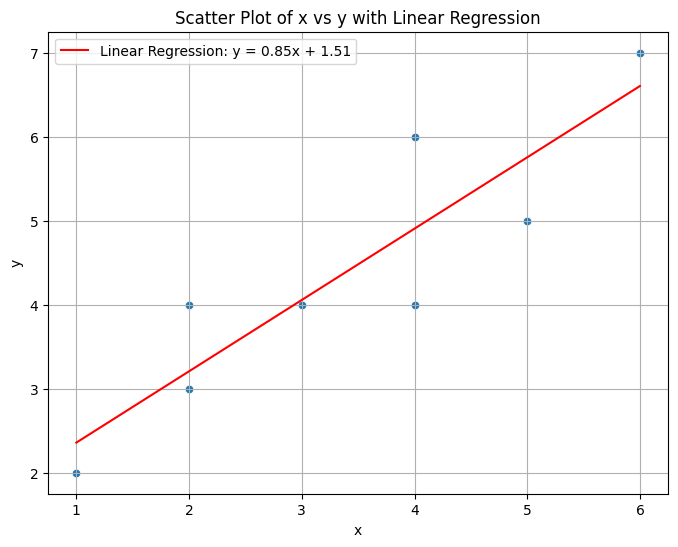

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Remove the 'Total' row before plotting
if 'Total' in df.index:
  df_plot = df.drop('Total')
else:
  df_plot = df.copy()


# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='x', y='y')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_plot['x'], df_plot['y'])
# Use the original x values for the regression line plot
x_line = df_plot['x']
y_line = intercept + slope * x_line

# Add regression line - create a range of x values for the line based on the original data
x_range = np.array([df_plot['x'].min(), df_plot['x'].max()])
y_range = intercept + slope * x_range

plt.plot(x_range, y_range, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


plt.title('Scatter Plot of x vs y with Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()